# Predicting Car Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

## Exploring the data

In [15]:
import pandas as pd

pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 
        'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location', 
        'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-type', 'num-of-cylinders', 
        'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [16]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [17]:
# select columns with continuous values
num_cols = ['normalized-losses', 'wheel-base', 'length', 
            'width', 'height', 'curb-weight', 'bore', 
            'stroke', 'compression-rate', 'horsepower', 
            'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars = cars[num_cols]

In [18]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data cleaning

In [19]:
# replace '?' values with nan
import numpy as np

num_cars = num_cars.replace('?', np.nan)

In [20]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [22]:
# change object type to numeric
num_cars = num_cars.astype(float)

In [23]:
# check for missing values
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [24]:
# remove rows with missing values in price
num_cars = num_cars.dropna(subset=['price'])

In [25]:
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [26]:
# replace other values with the average
num_cars = num_cars.fillna(num_cars.mean())

In [27]:
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [28]:
# normalize the values
price = num_cars['price']
num_cars = (num_cars - num_cars.min())/(num_cars.max()-num_cars.min())
num_cars['price'] = price

In [29]:
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate KNN

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train, target, df):
    """
    This function trains and tests a knn model
    train : training column name
    target : target column name
    df : dataframe object
    """
    np.random.seed(1)
    
    #split the data
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    split_index = int(len(df)/2)
    
    train_set = shuffled_df.iloc[0:split_index]
    test_set = shuffled_df.iloc[split_index:]
    
    #instantiate the model
    knn = KNeighborsRegressor()
    
    #fit the model
    knn.fit(train_set[[train]], train_set[target])
    
    #predictions
    predictions = knn.predict(test_set[[train]])
    
    #calculate the rmse
    mse = mean_squared_error(test_set[target], predictions)
    rmse = mse**(1/2)
    
    return rmse

In [37]:
# perform knn to each numeric column

features = [x for x in num_cars.columns if x != 'price']
rmses = {}

for f in features:
    rmse = knn_train_test(f, 'price', num_cars)
    rmses[f] = rmse
    
rmse_results = pd.Series(rmses)
rmse_results.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [39]:
# modify the function to accept a parameter for k

def knn_train_test(train, target, df):
    """
    This function trains and tests a knn model
    train : training column name
    target : target column name
    df : dataframe object
    """
    np.random.seed(1)
    
    #split the data
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    split_index = int(len(df)/2)
    
    train_set = shuffled_df.iloc[0:split_index]
    test_set = shuffled_df.iloc[split_index:]
    
    #instantiate the model
    k_vals = [1, 2, 3, 5, 7, 9]
    rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #fit the model
        knn.fit(train_set[[train]], train_set[target])
        
        #predictions
        predictions = knn.predict(test_set[[train]])
        
        #calculate the rmse
        mse = mean_squared_error(test_set[target], predictions)
        rmse = mse**(1/2)
        
        rmses[k] = rmse
    
    return rmses

In [41]:
k_rmses = {}

for f in features:
    rmses = knn_train_test(f, 'price', num_cars)
    k_rmses[f] = rmses
    

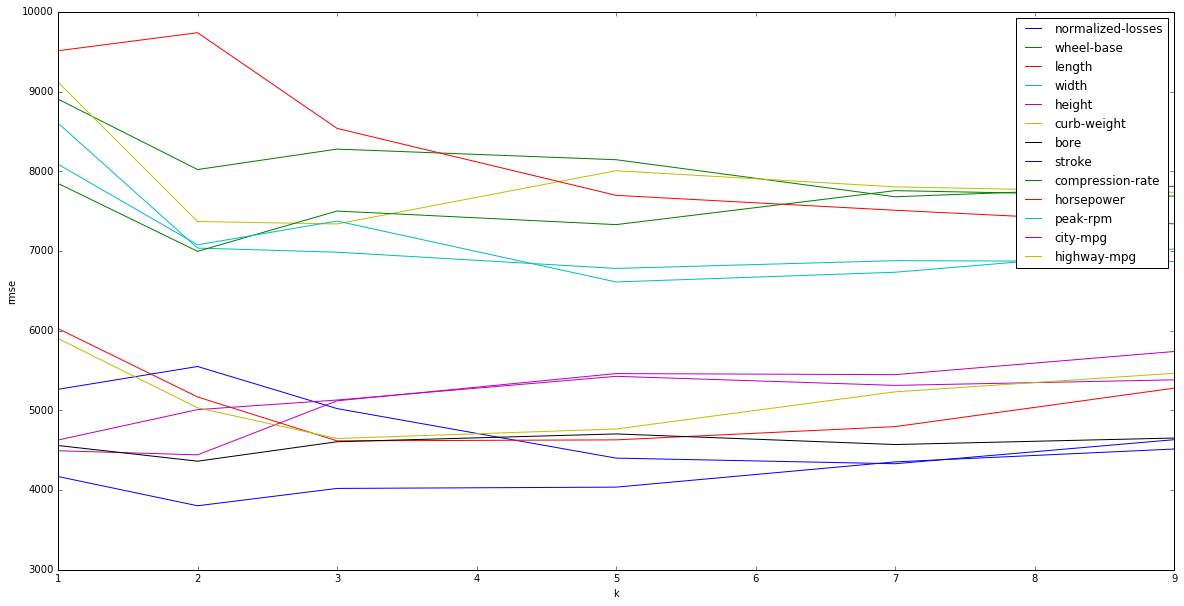

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))

for k, v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    col = k
    
    plt.plot(x, y)
    plt.legend(labels=features, loc='upper right')
    plt.xlabel('k')
    plt.ylabel('rmse')

## Multivariate Knn

In [82]:
def knn_train_test(train, target, df):
    """
    This function trains and tests a knn model
    train : list of training column names
    target : target column name
    df : dataframe object
    """
    np.random.seed(1)
    
    #split the data
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    split_index = int(len(df)/2)
    
    train_set = shuffled_df.iloc[0:split_index]
    test_set = shuffled_df.iloc[split_index:]
    
    #instantiate the model
    k_vals = [5]
    rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #fit the model
        knn.fit(train_set[train], train_set[target])
        
        #predictions
        predictions = knn.predict(test_set[train])
        
        #calculate the rmse
        mse = mean_squared_error(test_set[target], predictions)
        rmse = mse**(1/2)
        
        rmses[k] = rmse
    
    return rmses

In [83]:
# find the best features

feature_avg_rmse = {}
for k,v in k_rmses.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
avg_rmse = pd.Series(feature_avg_rmse)
sorted_avg_rmse = avg_rmse.sort_values()

print(sorted_avg_rmse)

horsepower           4150.021475
width                4576.191481
curb-weight          4866.821824
highway-mpg          5085.920776
wheel-base           5117.357032
length               5148.563953
city-mpg             5173.997238
compression-rate     7151.223720
bore                 7191.407131
normalized-losses    7519.527897
stroke               7895.037974
height               8139.630165
peak-rpm             8389.053004
dtype: float64


In [84]:
sorted_f = sorted_avg_rmse.index

In [85]:
k_rmse_results = {}

for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(sorted_f[:nr_best_feats],'price',num_cars)

k_rmse_results

{'2 best features': {5: 3589.3132622073304},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3358.6915801682458},
 '5 best features': {5: 3688.690291866061},
 '6 best features': {5: 3760.204908098905}}

## Hyperparameter tuning

In [86]:
def knn_train_test(train, target, df):
    """
    This function trains and tests a knn model
    train : list of training column names
    target : target column name
    df : dataframe object
    """
    np.random.seed(1)
    
    #split the data
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    split_index = int(len(df)/2)
    
    train_set = shuffled_df.iloc[0:split_index]
    test_set = shuffled_df.iloc[split_index:]
    
    #instantiate the model
    k_vals = [x for x in range(1,26)]
    rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        #fit the model
        knn.fit(train_set[train], train_set[target])
        
        #predictions
        predictions = knn.predict(test_set[train])
        
        #calculate the rmse
        mse = mean_squared_error(test_set[target], predictions)
        rmse = mse**(1/2)
        
        rmses[k] = rmse
    
    return rmses

In [87]:
k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_f[:nr_best_feats],
        'price',
        num_cars
    )

k_rmse_results

{'2 best features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 '3 best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702

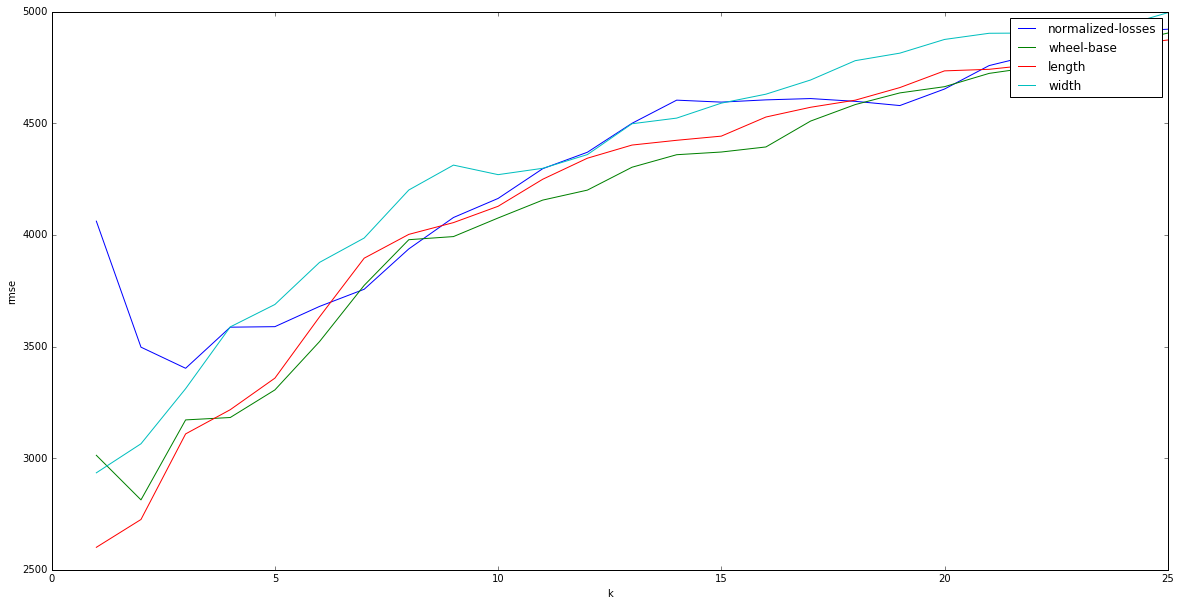

In [88]:
plt.figure(figsize=(20,10))

for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    col = k
    
    plt.plot(x, y)
    plt.legend(labels=features, loc='upper right')
    plt.xlabel('k')
    plt.ylabel('rmse')

For each model, the value for rmse decreases for a while and increases as the value for k changes. We can see from the plot that the optimal values of k are between 1 and 5.